# Linéarisation et équilibrage d'un ABR

In [62]:
import include.helpers as h

class Noeud:
    def __init__(self,val):
        self.clef = val
        self.gauche = None
        self.droite = None   
    def __str__(self): 
        return "{}".format(self.clef)
    
def inserer(R,val):
    if R == None:      R = Noeud(val)      
    elif val < R.clef: R.gauche = inserer(R.gauche,val)    
    elif val > R.clef: R.droite = inserer(R.droite,val)
    else:              pass
    return R

In [77]:
def lineariser(R):
    if R == None:
        return None, None, 0

    cnt = 0   
    if R.gauche:
        tete, queue, cnt = lineariser(R.gauche)
        R.gauche = None
        queue.droite = R
        queue = queue.droite
    else:
        tete = queue = R
    cnt += 1
        
    if R.droite:
        tete2, queue2, cnt2 = lineariser(R.droite)
        queue.droite = tete2
        queue = queue2
        cnt += cnt2

    return tete, queue, cnt

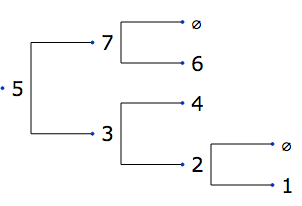

In [121]:
T = [ 5, 3, 2, 7, 6, 4, 1 ]; R = None;
for t in T: R = inserer(R,t)
h.afficher_arbre_binaire(R)

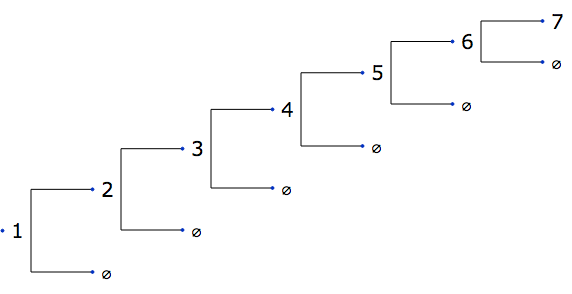

In [122]:
T, Q, c = lineariser(R) 
h.afficher_arbre_binaire(T)

In [123]:
def arboriser(L,n):
    if n == 0: return None, L
        
    RG, L = arboriser(L,(n-1)//2)
    R = L
    R.gauche = RG
    L = L.droite
    R.droite , L = arboriser(L,n//2)
    return R, L

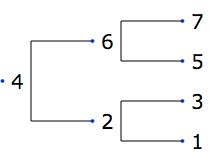

In [124]:
A , L = arboriser(T,c)
h.afficher_arbre_binaire(A)

In [129]:
def equilibrer(R):
    T, Q, c = lineariser(R) 
    A , L = arboriser(T,c)
    return A

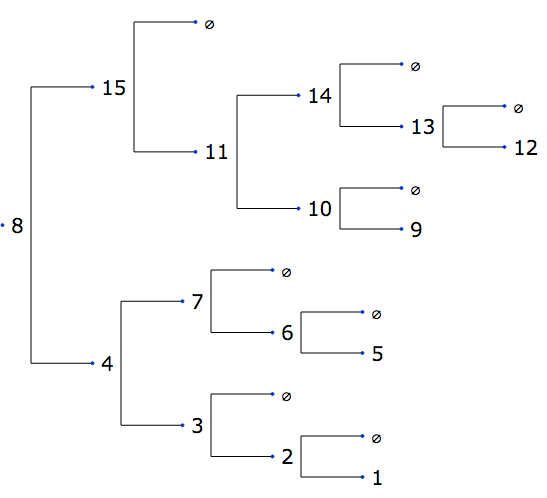

In [145]:
import numpy as np
R = None
for t in range(15):
    R = inserer(R,1+(7+t*11)%15)
h.afficher_arbre_binaire(R)

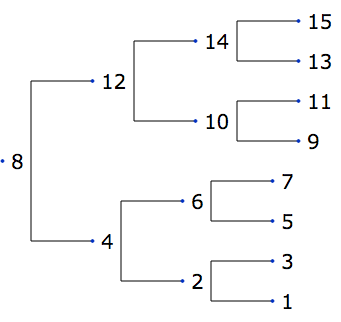

In [146]:
R = equilibrer(R)
h.afficher_arbre_binaire(R)